# Data loading

In [7]:
import pandas
from google.colab import drive
drive.mount('/content/drive/')
project_dir = '/content/drive/MyDrive/CIS 530 project/'
import sys
sys.path.append(project_dir)

major_class_train_data = pandas.read_csv(project_dir+"implicit_hate_train.csv")
major_class_dev_data = pandas.read_csv(project_dir+"implicit_hate_dev.csv")
major_class_test_data = pandas.read_csv(project_dir+"implicit_hate_test.csv")
print("major_class relevant keys: `post`, `class`")
print("  post: the tweet (str)")
print("  class: takes the values `explicit_hate`, `implicit_hate`, or `not_hate` (str)")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
major_class relevant keys: `post`, `class`
  post: the tweet (str)
  class: takes the values `explicit_hate`, `implicit_hate`, or `not_hate` (str)


In [8]:
minor_class_train_data = major_class_train_data[major_class_train_data['implicit_class'].notnull()].reset_index(drop=True)
minor_class_dev_data = major_class_dev_data[major_class_dev_data['implicit_class'].notnull()].reset_index(drop=True)
minor_class_test_data = major_class_test_data[major_class_test_data['implicit_class'].notnull()].reset_index(drop=True)

print("minor_class relevant keys: `post`, `implicit_class`")
print("  post: the tweet (str)")
print("  implicit_class: takes the values `incitement`, `inferiority`, `irony`, `stereotypical`, `threatening`, or `white_grievance` (str)")

minor_class relevant keys: `post`, `implicit_class`
  post: the tweet (str)
  implicit_class: takes the values `incitement`, `inferiority`, `irony`, `stereotypical`, `threatening`, or `white_grievance` (str)


# Majority class classifier

f1 score for class: 0.20529443544030254
f1 score for implicit_class: 0.0508160861517752


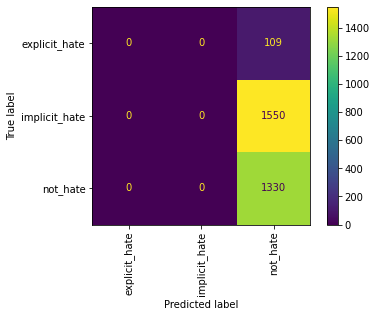

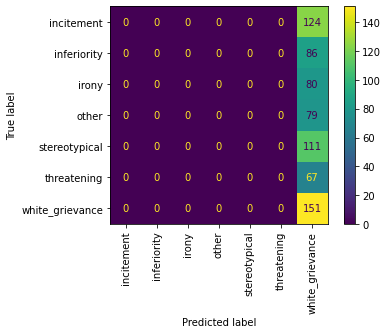

In [9]:
class MajorityClassClassifier:
  def __init__(self, key):
    self.key = key

  def train(self, data):
    self.prediction = data[self.key].value_counts().idxmax()

  def predict(self, data):
    return [self.prediction for example in range(data.shape[0])]

from evaluation import *
train_and_evaluate(MajorityClassClassifier("class"), major_class_train_data, major_class_test_data, "class")
train_and_evaluate(MajorityClassClassifier("implicit_class"), minor_class_train_data, minor_class_test_data, "implicit_class")